In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
# VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
file_path = "Restaurant reviews.csv"
df = pd.read_csv(file_path)

In [4]:
df.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


# Data Pre-Processing:

In [7]:
df = df[['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time']]

In [9]:
df.isnull().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Time,38


In [10]:
df = df.dropna(subset=['Review']) #Dropping those rows that has missing Reviews

In [11]:
df.isnull().sum()

,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Time,0


# Sentiment Analysis

In [12]:
sia = SentimentIntensityAnalyzer()

In [14]:
#VADER sentiment scoring
df['sentiment_score'] = df['Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [15]:
#Classifying sentiment
def get_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [16]:
df['Sentiment'] = df['sentiment_score'].apply(get_sentiment)

In [18]:
sentiment_counts = df['Sentiment'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Sentiment
Positive    7376
Negative    1834
Neutral      745
Name: count, dtype: int64


In [27]:
# Comparing the sentiment with Rating:
def rating_sentiment(rating):
    rating = pd.to_numeric(rating, errors='coerce')
    if pd.isna(rating):
        return "Unknown"
    if rating >= 4:
        return "Positive"
    elif rating <= 2:
        return "Negative"
    else:
        return "Neutral"

df['Rating_Sentiment'] = df['Rating'].apply(rating_sentiment)

In [28]:
rating_sentiment_counts = df['Rating_Sentiment'].value_counts()
print("Rating Sentiment Counts:")
print(rating_sentiment_counts)

Rating Sentiment Counts:
Rating_Sentiment
Positive    6268
Negative    2428
Neutral     1258
Unknown        1
Name: count, dtype: int64


# Visualization

/tmp/ipython-input-1915226850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


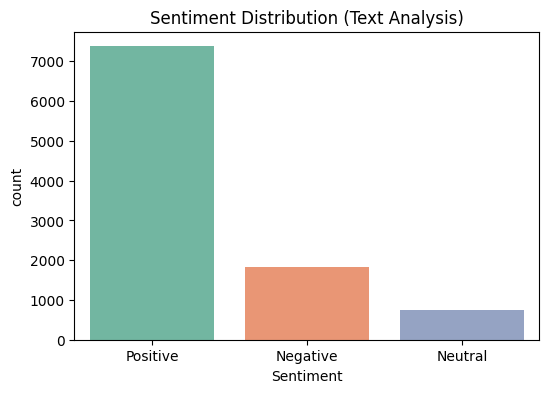

/tmp/ipython-input-1915226850.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating_Sentiment', data=df, palette='Set1')


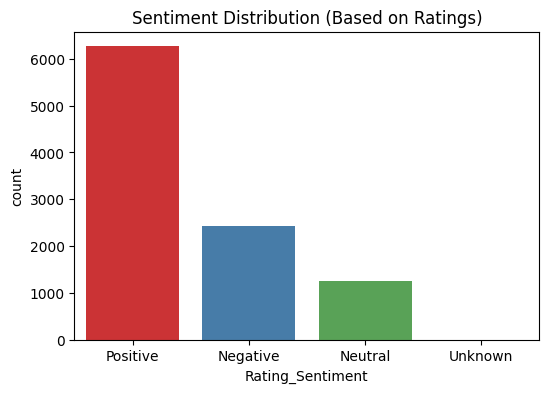

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution (Text Analysis)")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Rating_Sentiment', data=df, palette='Set1')
plt.title("Sentiment Distribution (Based on Ratings)")
plt.show()

# Word Cloud

In [30]:
from wordcloud import WordCloud, STOPWORDS

In [31]:
stopwords = set(STOPWORDS)

In [32]:
positive_text = " ".join(df[df['Sentiment'] == "Positive"]['Review'].astype(str))
wc_pos = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords).generate(positive_text)

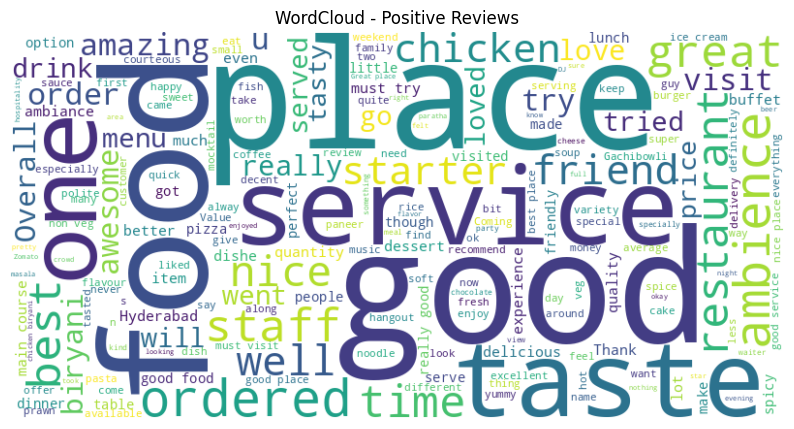

In [33]:
plt.figure(figsize=(10,6))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()

In [34]:
negative_text = " ".join(df[df['Sentiment'] == "Negative"]['Review'].astype(str))
wc_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds", stopwords=stopwords).generate(negative_text)

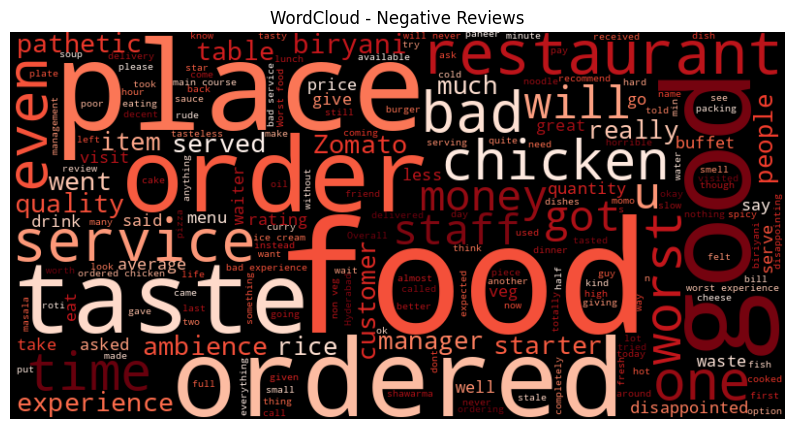

In [35]:
plt.figure(figsize=(10,6))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Negative Reviews")
plt.show()